# Lab 6 

### Newman Exercise 5.12 - Stefan-Boltzmann constant

For this problem, I apply gaussian quadriture to evaluate the total rate at which energy per unit area (W) is radiated by the sun

In [55]:
import numpy as np
from scipy import integrate
import math
import pylab as plt
%matplotlib inline

#constants:
h_bar= (6.626*10**-34)/(2*np.pi) # hbar,with units of Joules*seconds
kb= 1.38064852 * 10**-23     #Boltzmann's constant units of joules/kelvin
c= 2.998*10**8               #speed of light in m/s
T= 5778                      #temp of sun in K
a= 10**-10
b= np.inf


def f(x):
    "calculates the value of the unitless integrand"
    return np.exp(-x)*(x**3)/ (1-np.exp(-x))


y,error= integrate.quad(f,a,b)

y *= ((kb**4) * (T**4)) / ((4*np.pi**2) * (c**2) * (h_bar**3))

print("W  for the sun is ",y,"J/s(m^2)")
print ("error is",error,"J/s(m^2)")

#part c confirming stefan-Boltsman consant

SB= y/(T**4)
print ("calculated Stefan's Boltsman constant is ",SB,"J/s(m^2)(K^4)")

    

    
    

W is  63199439.290436454 J/s(m^2)
error is 2.6284711950259174e-09 J/s(m^2)
calculated Stefan's Boltsman constant is  5.67026133178027e-08 J/s(m^2)(K^4)


THe method used was the gaussian quadriture method, this function also outputs an error. In this case it was 2.628e-9 which is a very small error. 
The total rate at which energy is radiated by the sun per meter^2 over all frequencies (W) is 63199439.290436454 J/s(m^2). TO check this value we used Stefan's law, W= σT^4, and solved for σ using our calculated value of W. The literature value for σ is 5.670367×10−8 J/s(m^2)⋅(k^4). This is in agreement with our calculated value to 4 sigfigs. 

LIterature value used is from NIST (https://physics.nist.gov/cgi-bin/cuu/Value?sigma)

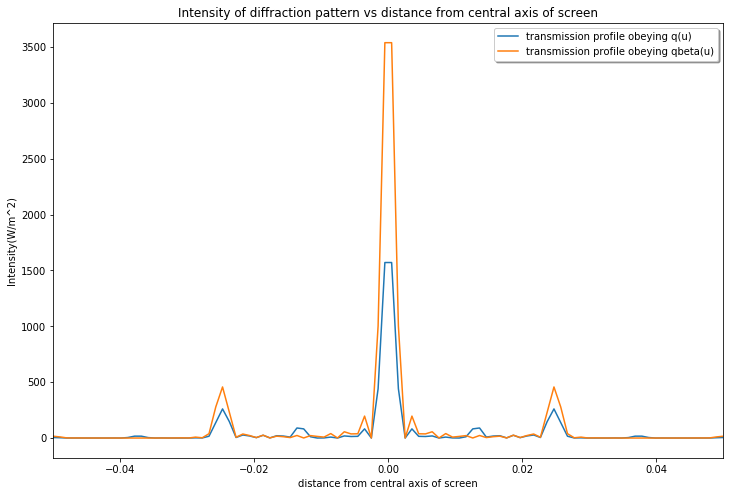

In [54]:
import cmath
import matplotlib.pyplot as plt

% matplotlib inline


#Constants:
separation= 20e-6             #seperation of slits on grating units= meters
w= 10*separation              #width of screen in meters
alpha= math.pi /separation
beta= alpha/2
f = 1                         #focal length in meter
lamda = 5e-7                  #wavelength of incident light in meters

screen=10e-2                  #width of screen in meters

#constants for simpsons
N = 100                       #number of steps to take
a = -w/2                      #lower boundary
b = w/2                       #upper boundary
h = ((b-a)/N)                 #size of step


def q(u):
    """Calculates the fraction of inicdent light that the grating lets through.
    
    arguments:
    u = distance along the grating
    
    returns: scalar float value that represents the fraction 
    of incident light that the grating lets through"""# return vlaue meaning taken from McDermott's docstring
    return math.sin(alpha*u)**2

def qbeta(u):
    """Calculates the fraction of inicdent light that the grating lets through.
    
    arguments:
    u = distance along the grating
    
    returns: scalar float value that represents the fraction 
    of incident light that the grating lets through"""# return vlaue meaning taken from McDermott's docstring
    return (math.sin(alpha*u)**2)*(math.sin(beta*u)**2) #made comment

def integrand(func,u,x):
    """Calculate integrand of light intensity
    arguments:
    func = function for calculating kernel of diffraction grating
    u = distance along grating
    x = distance along screen 
    
    returns: scalar float value that represents the fraction 
    of incident light that the grating lets through""" # return vlaue meaning taken from McDermott's docstring
    return math.sqrt(func(u))*cmath.exp(1j*2*math.pi*x*u/(lamda*f))


x_vals = np.linspace(-screen/2,screen/2,100)   
y_vals = []                                 # array to hold light intensity values for transmission profile that obeys q(u)
for i in x_vals:                            #calculates light intensity (y_vals) as a function of x (distance along screen)
    s =(integrand(q,a,i)/3) + (integrand(q,b,i)/3) #uses simpson's rule
    for k in range(1,100):                       
        if(k % 2 == 1):
            s += 4/3*integrand(q,a+(k)*h,i)
        else:
            s += 2/3*integrand(q,a+(k)*h,i)
    y_vals.append(abs(s)**2)
    
z_vals = []                       #array to hold light intensity values for transmission profile that obeys qbeta(u)
for i in x_vals:                  #calculates light intensity as a function of x (distance along screen)
    s =(integrand(qbeta,a,i)/3) + (integrand(qbeta,b,i)/3) #uses simpson's rule
    for k in range(1,100):
        if(k % 2 == 1):
            s += 4/3*integrand(qbeta,a+(k)*h,i)
        else:
            s += 2/3*integrand(qbeta,a+(k)*h,i)
    z_vals.append(abs(s)**2)

    
#plot formatting
plt.figure(figsize=(12, 8))
plt.plot(x_vals,z_vals, label="transmission profile obeying q(u)")
plt.plot(x_vals,y_vals,label = "transmission profile obeying qbeta(u)")
plt.xlim(-0.05,0.05)
plt.xlabel("distance from central axis of screen")
plt.ylabel("Intensity(W/m^2)")
plt.title ("Intensity of diffraction pattern vs distance from central axis of screen")
legend = plt.legend(loc='upper right', shadow=True)

The above figure depicts the intensity of diffraction patterns produced by a grating with differnt transmission function. BOth gratings had 10 slits in total, incident light of wavelength 500nm, a lense with focal length of 1 meter, and a 10 cm wide screen.  
The blue datapoints depict the intensity of diffraction pattern with a transmission profile that obeys q(u)= (sin(a*u))^2 where a is alpha and u is the distance along the grating.

The orange datapoints depict the intensity of the diffraction patterin with a transmission profile that obeys qbeta(u)= (sin(a*u))^2 * (sin(b*u))^2where a is alpha b is beta and u is the distance along the grating.

As seen in the graph above, the intensity of the diffraction pattern with a transmission profile that obeys qbeta(u) has higher intesnities but follows the same pattern as the diffreaction pattern with a transmission profile that obeys q(u). THIS makes sense because the transmission function describes fraction of incident light that the grating lets thoguh and because qbeta(u) allows a higher fraction of light to go through it would have higher intensities. 
